In [1]:
import pandas as pd
import numpy as np

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [3]:
!wget $data

--2025-10-07 03:53:06--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  2.35MB/s    in 0.4s    

2025-10-07 03:53:07 (2.35 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [7]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [40]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [9]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [41]:
selected_columns = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

df_small = df[selected_columns].copy()

In [44]:
for col in df_small.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())

engine_displacement
[170 130 220 210 190]
36
horsepower
[159.  97.  78.  nan 140.]
192
vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704
model_year
[2003 2007 2018 2009 2008]
24
fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

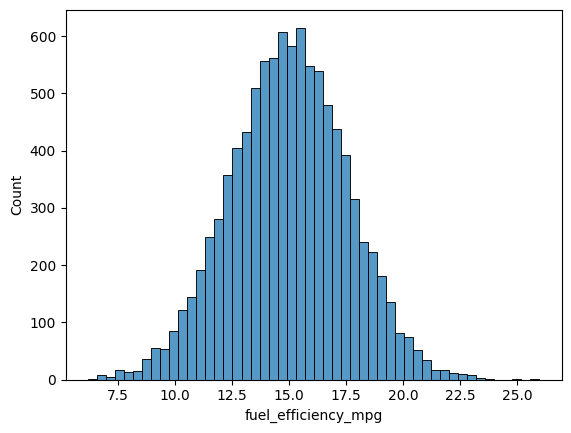

In [42]:
sns.histplot(df_small.fuel_efficiency_mpg, bins=50)

In [46]:
#Does it have a long tail?
df_small['fuel_efficiency_mpg'].skew()

np.float64(-0.012062219273507922)

In [ ]:

df_small.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [49]:
#Question: Which column has missing values based on the options provided in the homework?
#Horsepower column has missing values
df_median = df_small['horsepower'].median()
df_median

np.float64(149.0)

In [50]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test


In [51]:
n, n_val,n_test,n_train

(9704, 1940, 1940, 5824)

In [19]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [52]:
df_train = df_small.iloc[idx[:n_train]]
df_val = df_small.iloc[idx[n_train:n_train+n_val]]
df_test = df_small.iloc[idx[n_train+n_val:]]

In [53]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
246,170,164.0,2990.040917,2019,15.963019
8125,170,NaN,2729.623741,2012,15.931964
1927,200,142.0,3126.513375,2019,14.284901
8235,200,148.0,3136.477901,2003,14.865210
424,230,141.0,3384.681613,2006,12.428822
...,...,...,...,...,...
5313,210,145.0,3054.841280,2021,14.216871
4484,210,142.0,2440.034914,2021,17.826995
7107,260,169.0,2701.627103,2002,16.028769
9043,240,137.0,2383.896460,2016,17.794204


In [54]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [55]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [56]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [57]:
df_train.iloc[10]

engine_displacement     110.000000
horsepower              161.000000
vehicle_weight         3064.002707
model_year             2002.000000
Name: 10, dtype: float64

In [65]:
#Manual Implementation of linear regresssion
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [64]:
#Root Mean Squared Error(RMSE)
def rmse(y,y_pred):
    se = (y-y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [62]:
base = df_train.columns

In [76]:
#Fill missing values with 0
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred_0 = w0 + X_train.dot(w)

score = float(rmse(y_train, y_pred_0))
score


0.03902570026567233

In [78]:
#Fill missing values with mean
df_train_mean = float(df_train['horsepower'].mean())
df_train_mean
X_train = df_train[base].fillna(df_train_mean).values
w0, w = train_linear_regression(X_train, y_train)
y_pred_mean = w0 + X_train.dot(w)

score_mean = float(rmse(y_train, y_pred_mean))
score_mean

0.03579166325717397

In [ ]:
#Question: Which option gives better RMSE?
#Answer = mean

<Axes: ylabel='Count'>

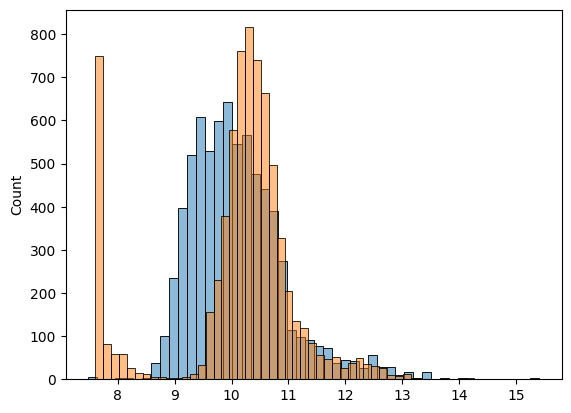

In [308]:
sns.histplot(y_pred, bins=50, alpha=0.5)
sns.histplot(y_train, bins=50, alpha=0.5)

In [309]:
def rmse(y,y_pred):
    error = y-y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [310]:
rmse(y_train,y_pred)

np.float64(0.7554192603920132)

In [311]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [312]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

np.float64(0.761653099130156)

In [313]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [316]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [ ]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017-df.year
    features.append('age')

    for v in [2,3,4]:
        df['number_of_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('number_of_doors_%s' %v)

    for v in makes:
        df['make_%s' %v] = (df.make == v).astype('int')
        features.append('make_%s' %v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X